In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("DataSets/ev_sales_by_makers_and_cat_15-24.csv")

In [4]:
df.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


In [5]:
df['Cat'].unique()

array(['3W', '2W', 'LMV', 'MMV'], dtype=object)

In [6]:
df['Total_Units'] = df.iloc[:, 2:].sum(axis=1)

In [19]:
vehicle_summary = df.groupby('Cat')['Total_Units'].sum().reset_index()

In [17]:
df.head(5)

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total_Units
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0,86
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51,2196
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0,2
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0,4
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578,2138


C:\Users\HP\AppData\Local\Temp\ipykernel_26184\607106469.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicle_summary, x='Cat', y='Total_Units', palette='Set2')


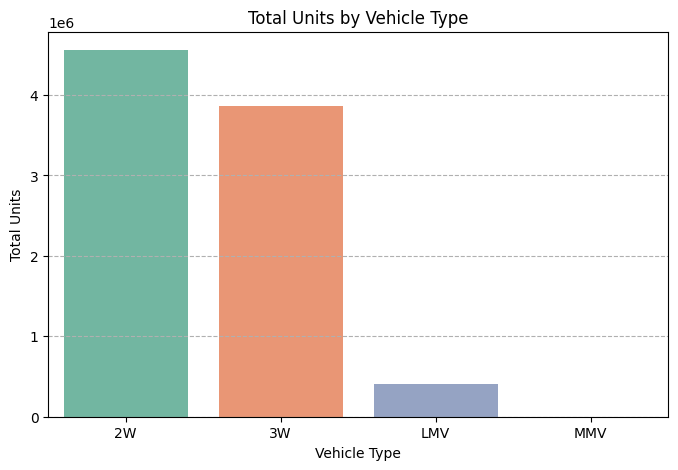

In [24]:
# Bar Plot: Total Units by Vehicle Type
plt.figure(figsize=(8, 5))
sns.barplot(data=vehicle_summary, x='Cat', y='Total_Units', palette='Set2')
plt.title('Total Units by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Units')
plt.grid(axis='y', linestyle='--')
plt.show()

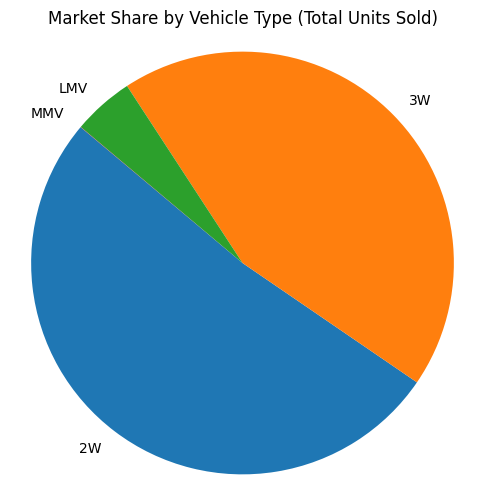

In [ ]:
# Group by vehicle category and sum total units
vehicle_totals = df.groupby('Cat')['Total_Units'].sum()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(vehicle_totals, labels=vehicle_totals.index, startangle=140)
plt.title('Market Share by Vehicle Type (Total Units Sold)')
plt.axis('equal')  
plt.show()

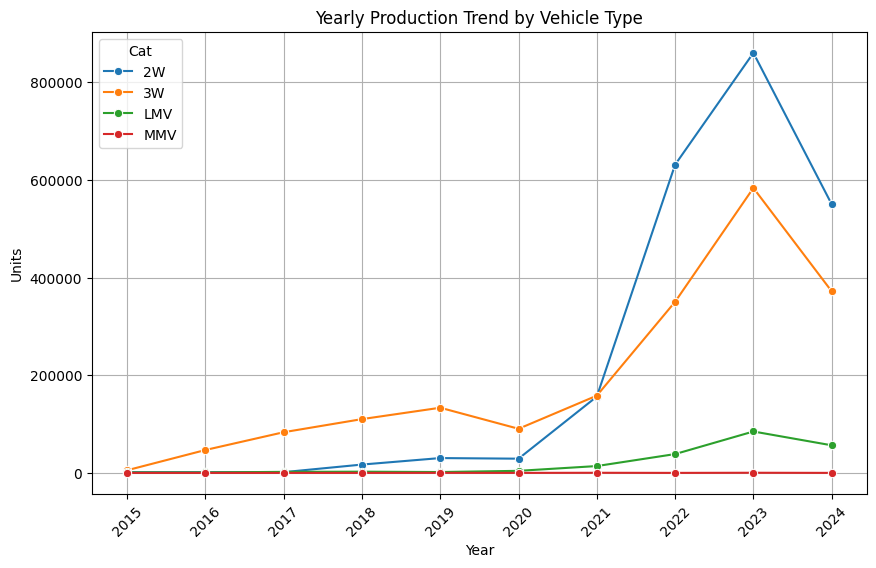

In [10]:
# Melt year columns to long format
melted_df = df.melt(id_vars=['Cat', 'Maker'], 
                    var_name='Year', value_name='Units',
                    value_vars=[str(y) for y in range(2015, 2025)])

# Group by Year and Cat
trend = melted_df.groupby(['Year', 'Cat'])['Units'].sum().reset_index()

# Line Plot: Yearly Production by Vehicle Type
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend, x='Year', y='Units', hue='Cat', marker='o')
plt.title('Yearly Production Trend by Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Units')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [31]:
melted_df.head()

,Cat,Maker,Year,Units
0,3W,"""VOLVO GROUP INDIA PVT LTD""",2015,0
1,3W,3EV INDUSTRIES PVT LTD,2015,0
2,2W,3GB TECHNOLOGY PVT LTD,2015,0
3,3W,3GB TECHNOLOGY PVT LTD,2015,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,2015,0


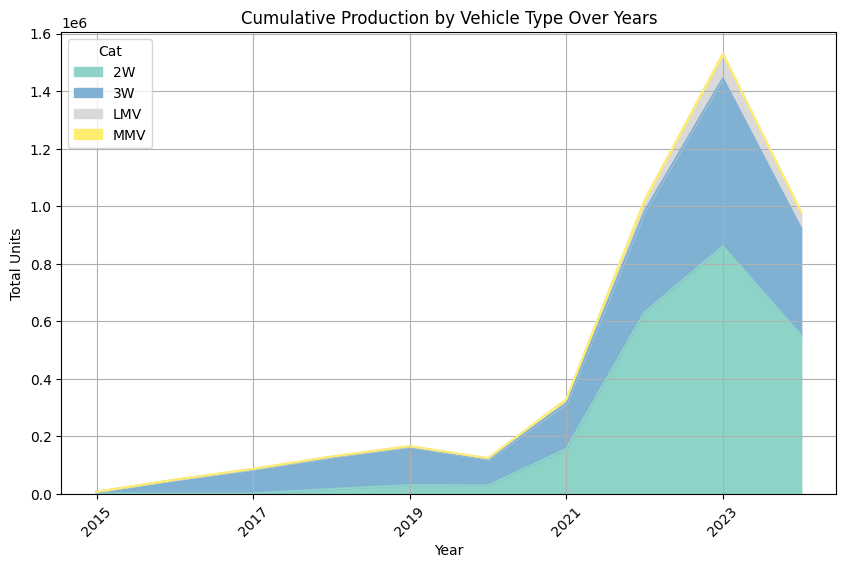

In [ ]:
pivot_df = melted_df.pivot_table(index='Year', columns='Cat', values='Units', aggfunc='sum').fillna(0)

# Plot
pivot_df.plot(kind='area', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Cumulative Production by Vehicle Type Over Years')
plt.xlabel('Year')
plt.ylabel('Total Units')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


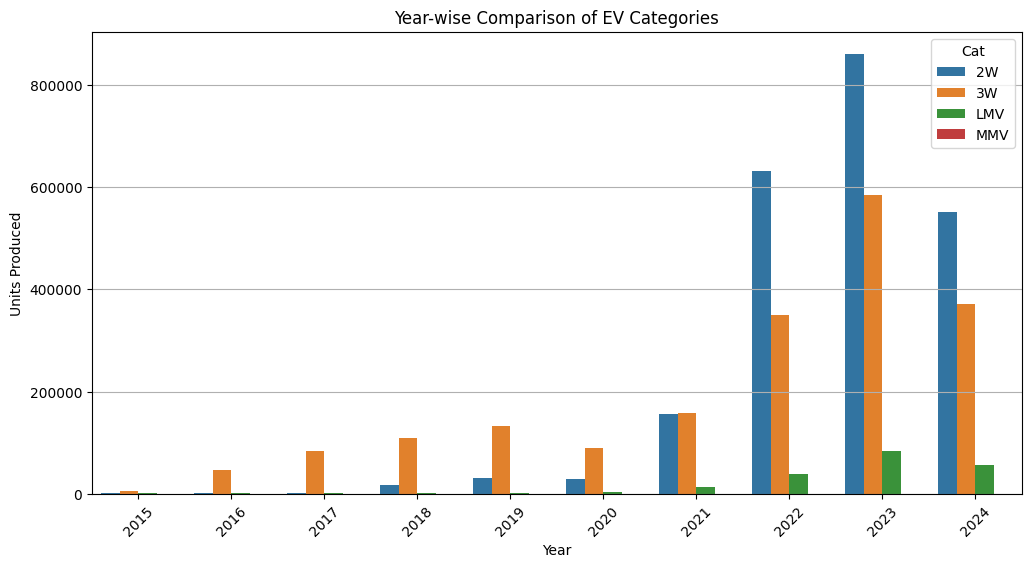

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=trend, x='Year', y='Units', hue='Cat')
plt.title('Year-wise Comparison of EV Categories')
plt.xlabel('Year')
plt.ylabel('Units Produced')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [67]:
df1 = pd.read_csv('DataSets\RS_Session_267_AU_3924_A.csv')

In [68]:
df1.head(5)

,Sl. No.,State/UT,e-2W,e-3W,Total
0,1,Andaman and Nicobar Islands,17,NaN,17
1,2,Andhra Pradesh,39331,2640.0,41971
2,3,Arunachal Pradesh,18,NaN,18
3,4,Assam,2464,12111.0,14575
4,5,Bihar,13672,10136.0,23808


In [69]:
df1 = df1.replace('NA', 0)
df1['e-2W'] = pd.to_numeric(df1['e-2W'])
df1['e-3W'] = pd.to_numeric(df1['e-3W'])
df1['Total'] = pd.to_numeric(df1['Total'])

In [70]:
df_sorted = df1.sort_values(by='Total', ascending=False)

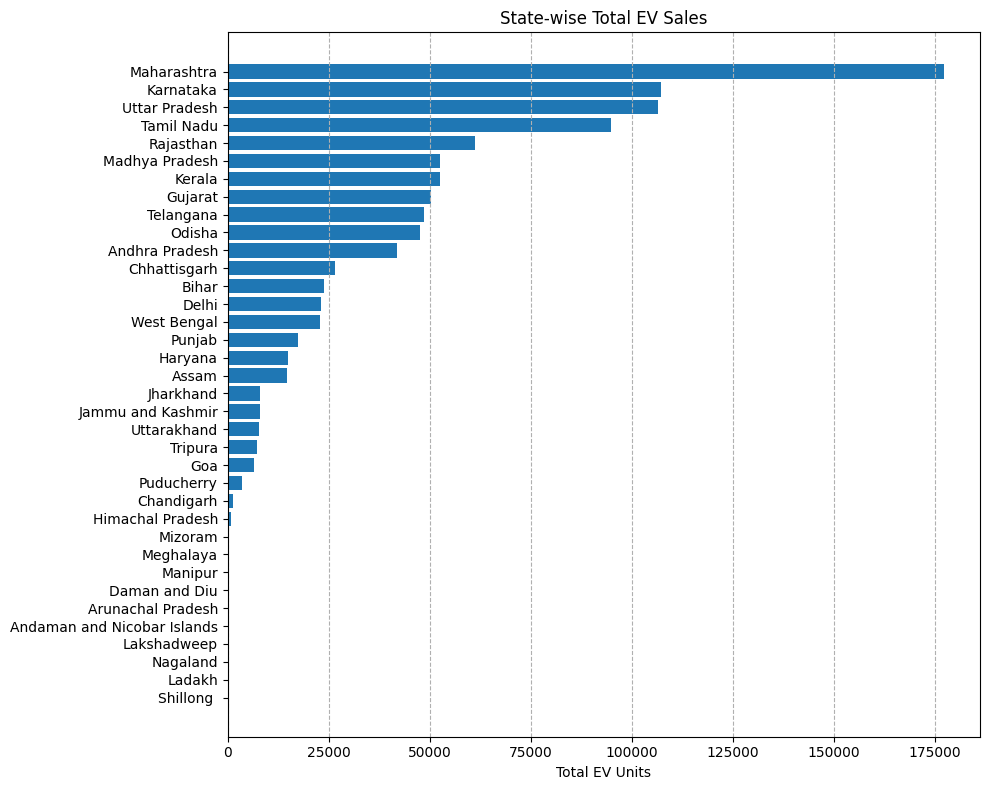

In [71]:
# Plot
plt.figure(figsize=(10, 8))
plt.barh(df_sorted['State/UT'], df_sorted['Total'])
plt.xlabel('Total EV Units')
plt.title('State-wise Total EV Sales')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

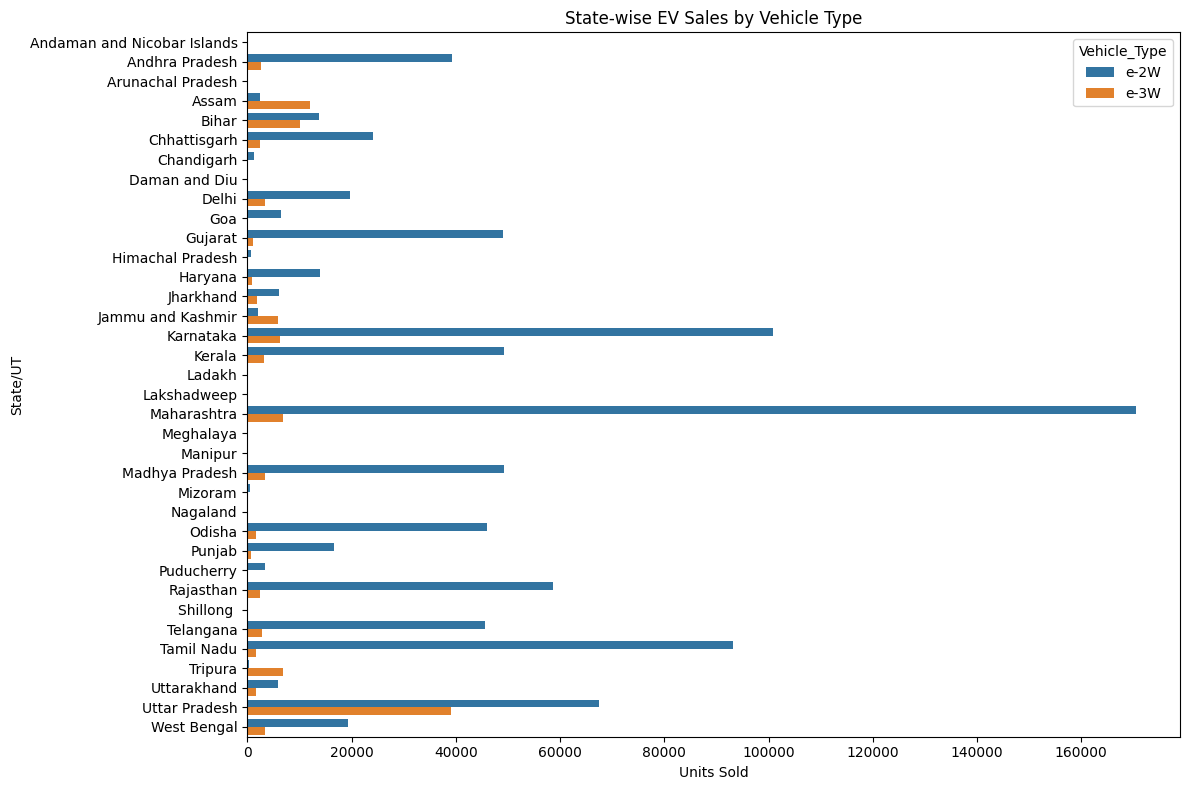

In [72]:
# Melt the data to long format
melted = df1.melt(id_vars='State/UT', value_vars=['e-2W', 'e-3W'], var_name='Vehicle_Type', value_name='Units')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=melted, x='Units', y='State/UT', hue='Vehicle_Type')
plt.title('State-wise EV Sales by Vehicle Type')
plt.xlabel('Units Sold')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()

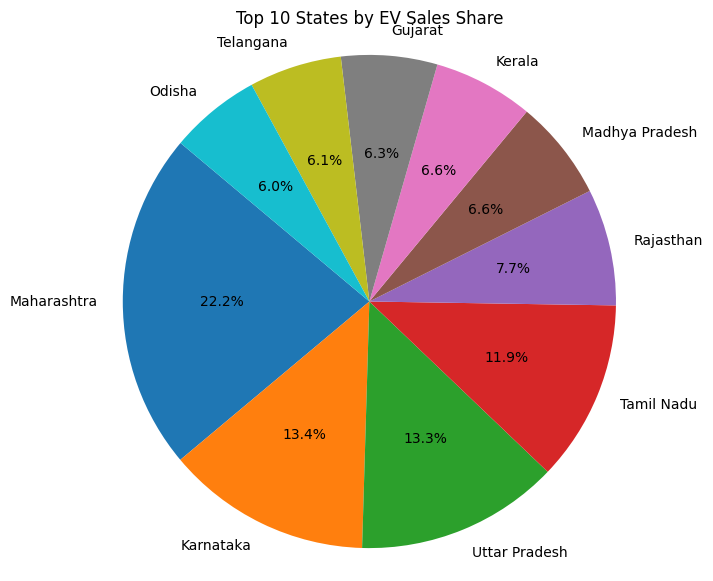

In [73]:
# Top 10 states by total sales
top_states = df_sorted.head(10)

plt.figure(figsize=(7, 7))
plt.pie(top_states['Total'], labels=top_states['State/UT'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 States by EV Sales Share')
plt.axis('equal')
plt.show()
# top_states
